Imorting libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, classification_report

Importing Dataset

In [23]:
dataset = pd.read_csv('titanic_train.csv')
testdata = pd.read_csv('titanic_test.csv')

Daya Analysis

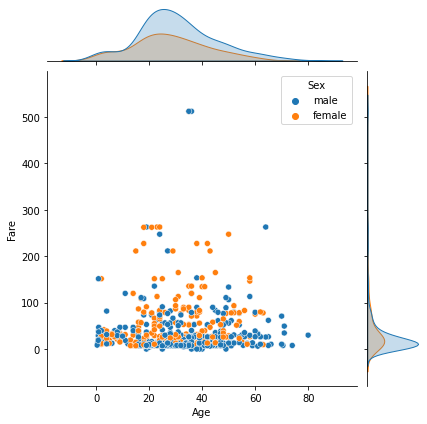

In [3]:
sns.jointplot(y = 'Fare', x = 'Age', data = dataset, hue = 'Sex')

Checking Missing Data

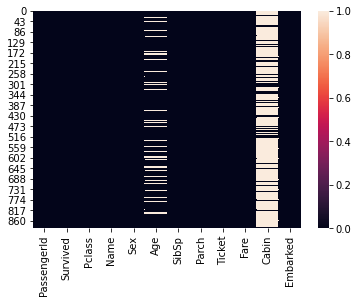

In [4]:
sns.heatmap(dataset.isnull())

In [5]:
sns.heatmap(testdata.isnull())

NameError: ignored

Assigning missing data values

In [6]:
dataset['Age'].fillna(value = dataset['Age'].mean(), inplace = True)

In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Keeping essential parameters

In [8]:
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

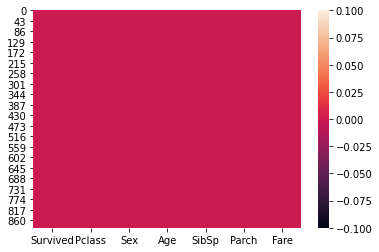

In [9]:
sns.heatmap(dataset.isnull())

In [10]:
dataset.dropna(inplace = True)

In [11]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Encoding categorical data

In [12]:
cat_feat = ['Sex']
dataset_1 = pd.get_dummies(dataset, columns= cat_feat, drop_first= True)

In [13]:
dataset_1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [14]:
x = dataset_1.drop('Survived', axis = 1)
y = dataset_1['Survived']

Splitting into train/test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training classification model

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Predictions

In [18]:
y_pred = classifier.predict(x_test)

Metrics

In [19]:
print(confusion_matrix(y_test, y_pred))

[[96 18]
 [17 48]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       114
           1       0.73      0.74      0.73        65

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



Performing analysis on the other test data file

In [24]:
testdata['Age'].fillna(value = testdata['Age'].mean(), inplace = True)

In [25]:
testdata_1 = pd.get_dummies(testdata, columns= cat_feat, drop_first= True)

In [26]:
testdata_1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis = 1, inplace = True)

In [27]:
testdata_1.dropna(inplace = True)

In [28]:
testdata_1

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.50000,0,0,7.8292,1
1,3,47.00000,1,0,7.0000,0
2,2,62.00000,0,0,9.6875,1
3,3,27.00000,0,0,8.6625,1
4,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1
414,1,39.00000,0,0,108.9000,0
415,3,38.50000,0,0,7.2500,1
416,3,30.27259,0,0,8.0500,1


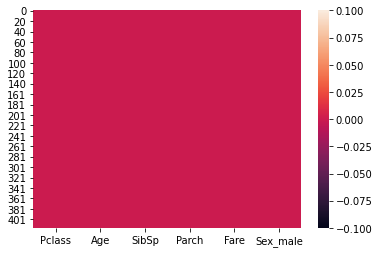

In [29]:
sns.heatmap(testdata_1.isnull())

In [30]:
y_pred = classifier.predict(sc.transform(testdata_1))